<a href="https://colab.research.google.com/github/luisaleiria/Projeto-de-Estatistica/blob/main/projEstatisitica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Projeto de Estatistica baseado no principio de Nayve Bayes


In [ ]:
#importando bibliotecas necessarias
import pandas as pd
import numpy as np
#importando bibliotecas para visualizacao
import seaborn as sns
import matplotlib.pyplot as plt
#scikit learn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
#importando o DataSet
df = pd.read_csv("/content/gapminder_alcohol_1.csv")


In [ ]:
#funcao para remover as linhas nulas
df.dropna(inplace=True)

Transformando dados continuos em dados categoricos

In [ ]:
#categorizando intervalo de valor de consumo em 3 faixas

def classificar(valor):
    if valor < 4:
        return 'consumo baixo'
    elif 4 <= valor < 8:
        return 'consumo moderado'
    else:
        return 'consumo alto'

# Aplicar a função à coluna 'coluna_original' para criar uma nova coluna 'coluna_classificada'
df['consumo_alcool'] = df['alcconsumption'].apply(classificar)

In [ ]:
#categorizando intervalo de renda em 4 faixas

def classificar(valor):
    if valor < 600:
        return 'muito baixa'
    elif 600 <= valor < 2400:
        return 'baixa'
    elif 2400 <= valor < 8600:
        return 'media'
    else:
        return 'alta'

# Aplicar a função à coluna 'coluna_original'para criar uma nova coluna 'coluna_classificada'
df['renda'] = df['incomeperperson'].apply(classificar)


In [ ]:
#categorizando a taxa de suicidio em 3 faixas

def classificar(valor):
    if valor < 5.8:
        return 'muito baixa'
    elif 5.8 <= valor < 9:
        return 'baixa'
    elif 9 <= valor < 13:
        return 'media'
    else:
        return 'alta'

# Aplicar a função à coluna 'coluna_original' para criar uma nova coluna 'coluna_classificada'
df['tax_suicidio'] = df['suicideper100th'].apply(classificar)


In [ ]:
#categorizando a taxa de emprego em 3 faixas

def classificar(valor):
    if valor < 51.5:
        return 'muito baixa'
    elif 51.5 <= valor < 58.8:
        return 'baixa'
    elif 58.8 <= valor < 65:
        return 'media'
    else:
        return 'alta'

# Aplicar a função à coluna 'coluna_original' para criar uma nova coluna 'coluna_classificada'
df['tax_emprego'] = df['employrate'].apply(classificar)


In [ ]:
#categorizando a taxa urbana em 3 faixas

def classificar(valor):
    if valor < 37:
        return 'muito baixa'
    elif 37 <= valor < 57.6:
        return 'baixa'
    elif 57.6 <= valor < 73.4:
        return 'media'
    else:
        return 'alta'

# Aplicar a função à coluna 'coluna_original' para criar uma nova coluna 'coluna_classificada'
df['tax_urbana'] = df['urbanrate'].apply(classificar)


In [ ]:
df.describe()

,alcconsumption,incomeperperson,suicideper100th,employrate,urbanrate
count,162.000000,162.000000,162.000000,162.000000,162.000000
mean,6.812407,7240.949358,9.924773,59.074691,55.822099
std,4.995732,10489.917556,6.330316,10.364735,22.534784
min,0.050000,103.775857,0.201449,34.900002,10.400000
25%,2.707500,599.188702,5.785134,51.575001,36.965000
50%,6.100000,2385.184105,9.050307,58.850000,57.610000
75%,9.930000,8602.284306,12.755157,65.000000,73.395000
max,23.010000,52301.587180,35.752872,83.199997,100.000000


In [ ]:
#removendo linhas nulas
df.dropna(how='all', inplace=True)

# **EDA**

Vamos verificar se o dataset escolhido esta balanceado

<ipython-input-72-ffc794ed6862>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df["consumo_alcool"], palette=cores, hue_order=ordem_consumo_alcool)


<Axes: xlabel='consumo_alcool', ylabel='count'>

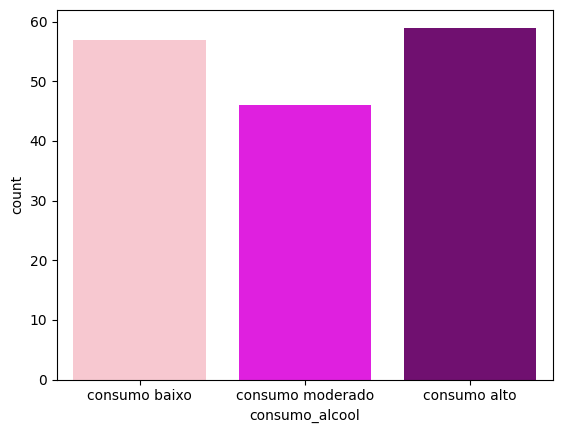

In [ ]:
cores = ['pink', 'magenta', 'purple']
ordem_consumo_alcool = ['consumo baixo', 'consumo moderado', 'consumo alto']
df['consumo_alcool'] = pd.Categorical(df['consumo_alcool'], categories=ordem_consumo_alcool, ordered=True)
sns.countplot(x = df["consumo_alcool"], palette=cores, hue_order=ordem_consumo_alcool)

Observando o grafico, vemos que ele esta balanceado

Vamos agora verificar se o grafico esta com algum valor faltando e realizar a correção


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 1 to 212
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   country          162 non-null    object  
 1   alcconsumption   162 non-null    float64 
 2   incomeperperson  162 non-null    float64 
 3   suicideper100th  162 non-null    float64 
 4   employrate       162 non-null    float64 
 5   urbanrate        162 non-null    float64 
 6   consumo_alcool   162 non-null    category
 7   renda            162 non-null    object  
 8   tax_suicidio     162 non-null    object  
 9   tax_emprego      162 non-null    object  
 10  tax_urbana       162 non-null    object  
dtypes: category(1), float64(5), object(5)
memory usage: 14.2+ KB


Observando as informações recebidas com os dados do grafico, vemos que o numero de dados não nulos é compativel com o count ( numero de dados ) do dataset.

Agora vamos contabilizar o numero de linhas nulas para certificar que realmente elas não estão presentes na analise

In [ ]:
df.isnull().sum()

country            0
alcconsumption     0
incomeperperson    0
suicideper100th    0
employrate         0
urbanrate          0
consumo_alcool     0
renda              0
tax_suicidio       0
tax_emprego        0
tax_urbana         0
dtype: int64

<Axes: xlabel='renda', ylabel='count'>

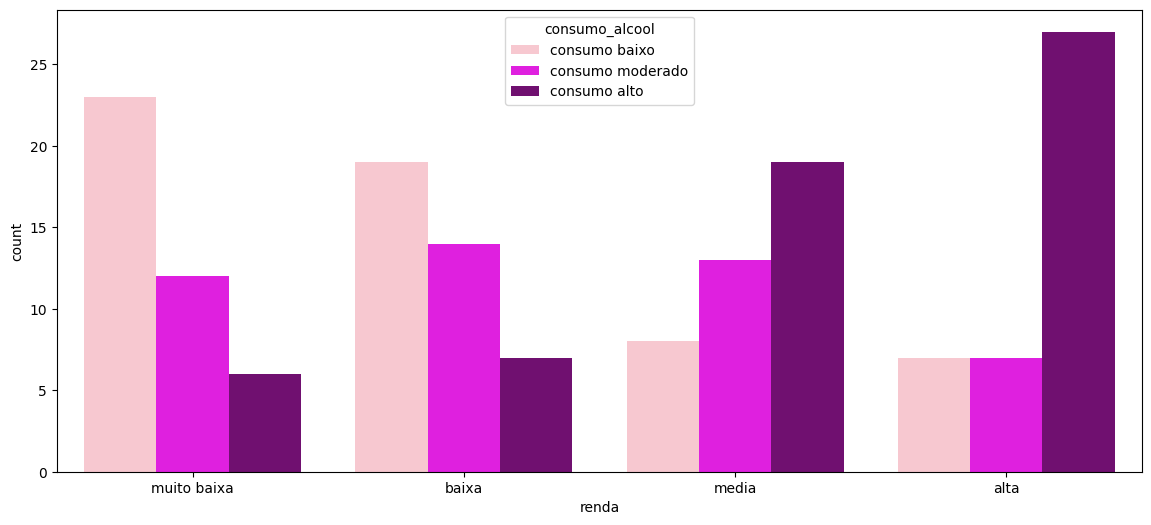

In [ ]:
#plotando a renda per capita pelo consumo de alcool
plt.figure(figsize=(14,6))
cores = ['pink', 'magenta', 'purple']
ordem = ['muito baixa', 'baixa', 'media', 'alta']
df['renda'] = pd.Categorical(df['renda'], categories=ordem, ordered=True)
sns.countplot(x='renda',data=df,hue="consumo_alcool", palette=cores)

<Axes: xlabel='tax_suicidio', ylabel='count'>

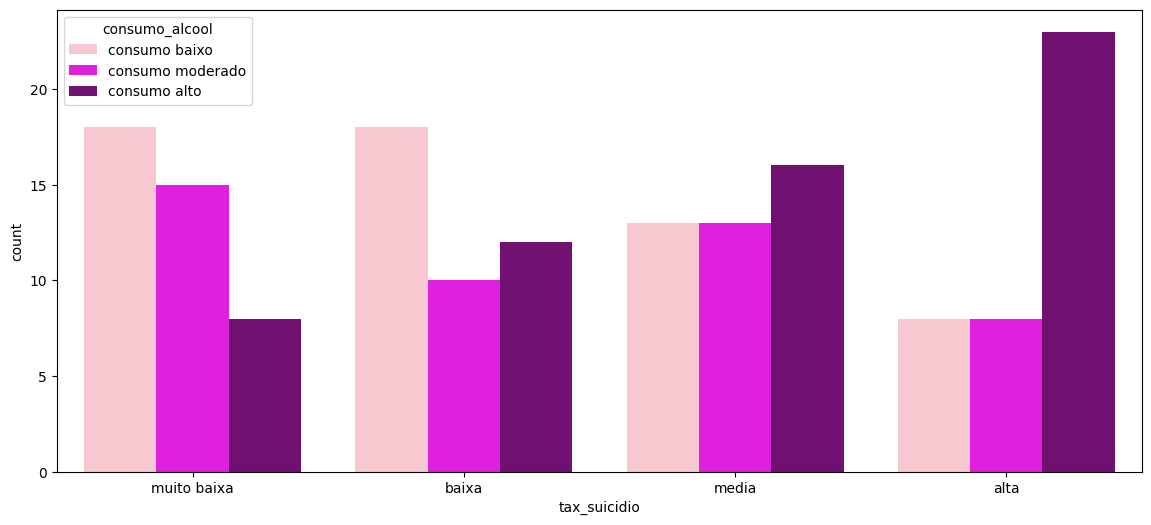

In [ ]:
#plotando a taxa de suicidio pelo consumo de alcool
plt.figure(figsize=(14,6))
cores = ['pink', 'magenta', 'purple']
ordem = ['muito baixa', 'baixa', 'media', 'alta']
df['tax_suicidio'] = pd.Categorical(df['tax_suicidio'], categories=ordem, ordered=True)
sns.countplot(x='tax_suicidio',data=df,hue="consumo_alcool", palette=cores)

<Axes: xlabel='tax_emprego', ylabel='count'>

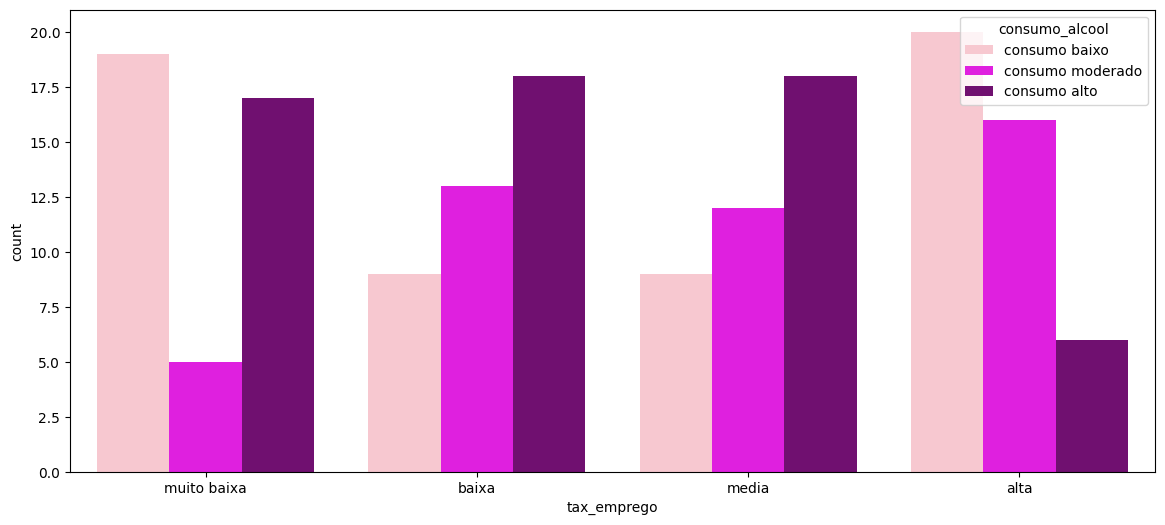

In [ ]:
#plotando a taxa de emprego pelo consumo de alcool
plt.figure(figsize=(14,6))
cores = ['pink', 'magenta', 'purple']
ordem = ['muito baixa', 'baixa', 'media', 'alta']
df['tax_emprego'] = pd.Categorical(df['tax_emprego'], categories=ordem, ordered=True)
sns.countplot(x='tax_emprego',data=df,hue="consumo_alcool", palette=cores)

<Axes: xlabel='tax_urbana', ylabel='count'>

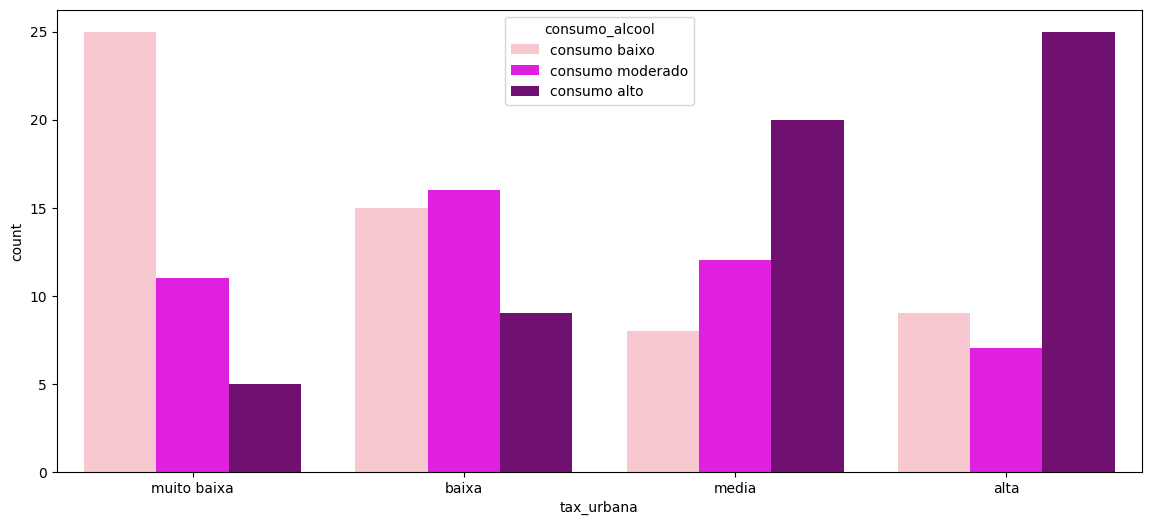

In [ ]:
#plotando a taxa urbana pelo consumo de alcool
plt.figure(figsize=(14,6))
cores = ['pink', 'magenta', 'purple']
ordem = ['muito baixa', 'baixa', 'media', 'alta']
df['tax_urbana'] = pd.Categorical(df['tax_urbana'], categories=ordem, ordered=True)
sns.countplot(x='tax_urbana',data=df,hue="consumo_alcool", palette=cores)

In [ ]:
#separando a variavel target das outras
y = df["consumo_alcool"]
X = df.drop("consumo_alcool", axis = 1)

In [ ]:
#Separando o dataset em treinamento e teste
colunas = ['incomeperperson','suicideper100th', 'employrate', 'urbanrate']
X = X[colunas]

# **Feature Engineering**

Vamos classificar os dados para aplicar o algoritmo de Bayes



In [ ]:
#categorizando a renda em 4 faixas


# Definindo os limites das faixas de renda
limits = [0, 2400, 8600, 53000]


# Definindo os rótulos para as faixas de renda
labels = [1, 2, 3]


# Utilizando a função cut para categorizar a renda
X['income_category'] = pd.cut(X['incomeperperson'], bins=limits, labels=labels, include_lowest=True)


# Convertendo a nova coluna para o tipo inteiro, se necessário
X['income_category'] = X['income_category'].astype(int)


In [ ]:
#categorizando a taxa de suicidio em 4 faixas

# Definindo os limites das faixas de renda
limits = [0, 9, 13, 36]

# Definindo os rótulos para as faixas de renda
labels = [1, 2, 3]

# Utilizando a função cut para categorizar a renda
X['suicide_category'] = pd.cut(X['suicideper100th'], bins=limits, labels=labels, include_lowest=True)

# Convertendo a nova coluna para o tipo inteiro, se necessário
X['suicide_category'] = X['suicide_category'].astype(int)


# Aplicação do Naive Bayes

In [ ]:
#Separando o dataset em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=None)

In [ ]:
#Treinando o algoritmo
clf = CategoricalNB()
clf.fit(X_train, y_train)

X_train.shape
X_test.shape

(33, 6)

In [ ]:
#Realizando o teste
y_pred = clf.predict(X_test)

# **RESULTADOS**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.5151515151515151
Classification Report:
                  precision    recall  f1-score   support

    consumo alto       0.69      0.73      0.71        15
   consumo baixo       0.56      0.38      0.45        13
consumo moderado       0.12      0.20      0.15         5

        accuracy                           0.52        33
       macro avg       0.46      0.44      0.44        33
    weighted avg       0.55      0.52      0.52        33



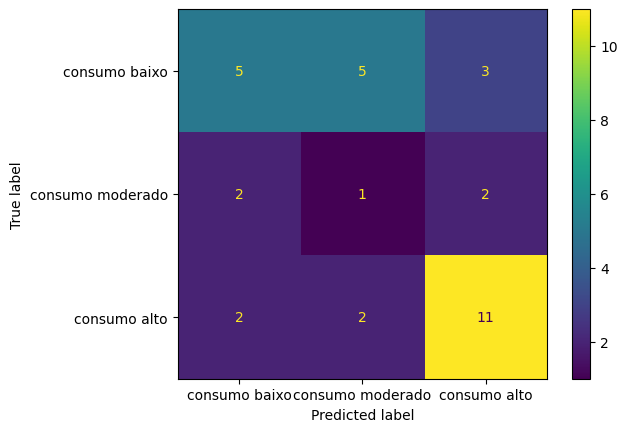

In [ ]:
labels = ['consumo baixo','consumo moderado','consumo alto']
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();